# Load the data, train the model, evaluate the model, save the model
In this notebook we can train a classifier to classify flowers based on sepal and  petal length / width. 

In [7]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from pandas import DataFrame, read_csv
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from joblib import dump, load
import datetime


def get_time():
    now = datetime.datetime.now()
    return "%d%d%d-%d%d" % (now.year, now.month, now.day, now.hour, now.minute)



### Read the dataset, explore it and split into training and test data

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           75.00000         75.000000          75.000000   
mean             5.78800          3.006667           3.692000   
std              0.71678          0.377522           1.658293   
min              4.30000          2.200000           1.100000   
25%              5.20000          2.800000           1.500000   
50%              5.80000          3.000000           4.300000   
75%              6.35000          3.200000           4.950000   
max              7.70000          4.200000           6.900000   

       petal width (cm)      class  
count         75.000000  75.000000  
mean           1.182667   0.973333  
std            0.729564   0.787973  
min            0.100000   0.000000  
25%            0.300000   0.000000  
50%            1.300000   1.000000  
75%            1.800000   2.000000  
max            2.400000   2.000000  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0

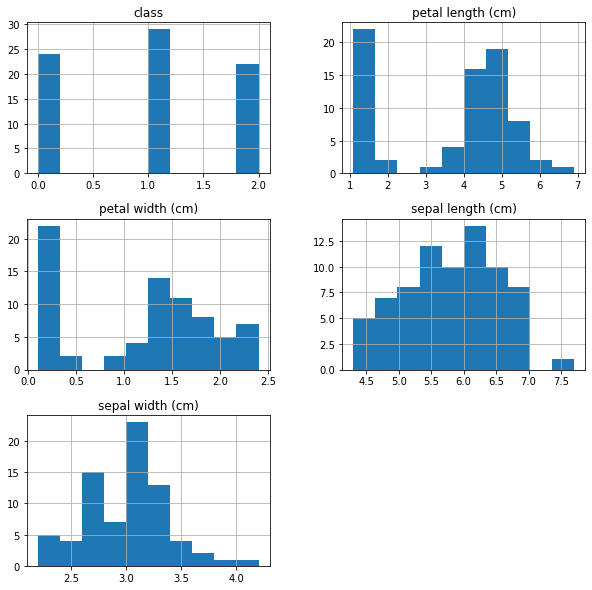

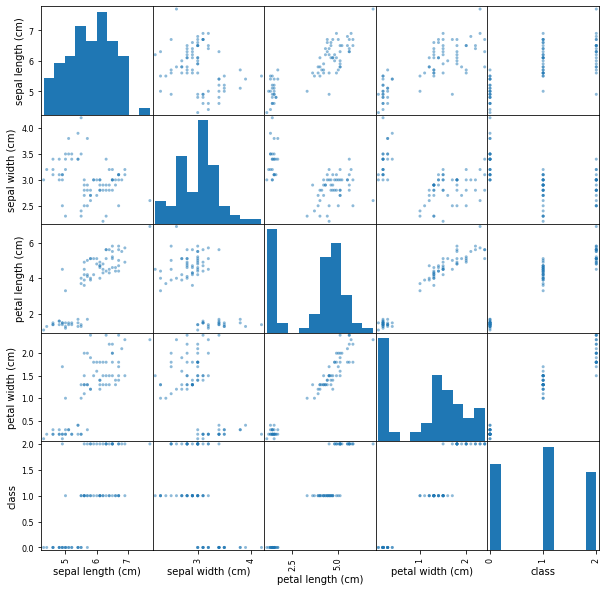

In [8]:
iris = read_csv('data/training-data.csv')
print(iris.describe())

print(iris.head(20))
iris.hist()
plt.show()


scatter_matrix(iris)
plt.show()

X = iris.values[:, :-1]
Y = iris.values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

### Set hyperparameters and train the model
Here we're using cross validation for evaluating the resuls. Try changing different hyperparameters of the KNeighborsClassifier or DecisionTreeClassifier.

Read about more about [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html)

Read about more about [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

There are plenty of other algorithms to try as well!

In [84]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def generate_k_neighbors_classifier():
    n_neighbors = 3
    predictor = KNeighborsClassifier(
        n_neighbors=n_neighbors)
    return predictor

def generate_decision_tree_classifier():
    n_neighbours = 3
    max_depth=None
    min_samples_split=2
    min_samples_leaf=2
    predictor = DecisionTreeClassifier(
        max_depth=max_depth, 
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf)
    return predictor

predictor = generate_k_neighbors_classifier()
print(predictor)

predictor.fit(X_train, Y_train)
scores = cross_validate(predictor, X, Y, cv=5, return_train_score=True)
print(scores['test_score'])
print(np.mean(scores['test_score']))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
[1.         0.9375     1.         1.         0.92307692]
0.9721153846153847


###  Save the model
Does not work if working in the coud

In [89]:
# dump(predictor, 'models/model-%s.joblib' % get_time())

### Finally we can train the data on everything before testing on test data

In [88]:

predictor.fit(X, Y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Evaluate

Wait with this cell until everyone is ready

In [87]:
def evaluate(predictor):
    iris = read_csv('data/test-data.csv')

    X = iris.values[:, :-1]
    Y = iris.values[:, -1]


    pred = predictor.predict(X)
    print(accuracy_score(Y, pred))
    
# evaluate(predictor)


0.9866666666666667
